In [1]:
import torch 
import torch.nn as nn 

import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('day_head_circumference.csv').values

In [3]:
x_train = torch.tensor(data[:,0], dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(data[:,1], dtype=torch.float32).reshape(-1, 1)

In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self, in_features, out_features):
        # Model variables
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    # Predictor
    def forward(self, x):
        o = nn.Sigmoid()
        return 20 * o(x * self.linear.weight + self.linear.bias) + 31

In [5]:
model = LinearRegressionModel(1,1)

In [6]:
learning_rate = 0.0001
epochs = 8000

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
loss = 0
losses = []

In [9]:
for i in range(epochs):
    y_pred = model.forward(x_train)
    
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    i += 1

In [10]:
W = model.linear.weight.item()
b = model.linear.bias.item()

print(f'W: {W}, b: {b}, loss: {loss}')

W: 0.0031170255970209837, b: -0.24673257768154144, loss: 2.523662567138672


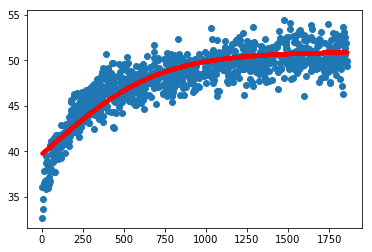

In [11]:
# Visualize result
plt.scatter(x_train, y_train)
plt.plot(x_train, model.forward(x_train).detach(), 'r.')